In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/factbook.csv')
df.head()

,Country,Area,Birth rate,Current account balance,Death rate,Electricity consumption,Electricity production,Exports,GDP,GDP per capita,...,Life expectancy at birth,Military expenditures,Natural gas consumption,Oil consumption,Population,Public debt,Railways,Reserves of foreign exchange & gold,Total fertility rate,Unemployment rate
0,Japan,"377,835",9.47,"$170,200,000,000.00",8.95,"971,000,000,000","1,044,000,000,000.00","$538,800,000,000.00","$3,745,000,000,000.00","$29,400.00",...,81.15,1,"80,420,000,000.00","5,290,000","127,417,244",164.3,23705,"664,600,000,000.00",1.39,4.7
1,Germany,"357,021",8.33,"$73,590,000,000.00",10.55,"519,500,000,000","560,000,000,000.00","$893,300,000,000.00","$2,362,000,000,000.00","$28,700.00",...,78.65,1.5,"99,550,000,000.00","2,891,000","82,431,390",65.8,46039,"96,840,000,000.00",1.39,10.6
2,Saudi Arabia,"1,960,582",29.56,"$51,500,000,000.00",2.62,"128,500,000,000","138,200,000,000.00","$113,000,000,000.00","$310,200,000,000.00","$12,000.00",...,75.46,10,"56,400,000,000.00","1,550,000","26,417,599",75,1392,"23,620,000,000.00",4.05,25
3,Russia,"17,075,200",9.80,"$46,040,000,000.00",14.52,"894,300,000,000","915,000,000,000.00","$162,500,000,000.00","$1,408,000,000,000.00","$9,800.00",...,67.10,,"405,800,000,000.00","2,310,000","143,420,309",28.2,87157,"124,500,000,000.00",1.27,8.3
4,Switzerland,"41,290",9.77,"$40,950,000,000.00",8.48,"54,530,000,000","63,470,000,000.00","$130,700,000,000.00","$251,900,000,000.00","$33,800.00",...,80.39,1,"3,093,000,000.00","290,400","7,489,370",57.2,4533,"69,580,000,000.00",1.42,3.4


In [4]:
df = df.replace(' ', np.nan)

In [5]:
df.rename(columns={'Country':'country', ' Area':'area', ' Birth rate':'birth rate', '  Current account balance ':'current account balance',
       ' Death rate':'death rate', ' Electricity consumption':'electricity consumption', '  Electricity production ':'electricity production',
       '  Exports ':'exports', '  GDP ':'gdp', '  GDP per capita ':'gdp per capita', ' GDP real growth rate':'gdp real growth rate',
       '  Highways ':'highways', '  Imports ':'imports', ' Industrial production growth rate':'industrial production growth rate',
       ' Infant mortality rate':'infant mortality rate', ' Inflation rate ':'inflation rate', '  Internet users ':'internet users',
       ' Investment':'investment', '  Labor force ':'labor force', ' Life expectancy at birth':'life expectancy at birth',
       ' Military expenditures':'military expenditures', '  Natural gas consumption ':'natural gas consumption',
       '  Oil consumption ':'oil consumption', '  Population ':'population', ' Public debt':'public debt', ' Railways':'railways',
       '  Reserves of foreign exchange & gold ':'reserves of foreign exchange and gold', ' Total fertility rate':'total fertility rate',
       ' Unemployment rate':'unemployement rate'}, inplace=True)

In [7]:
df = df[['exports', 'imports', 'industrial production growth rate', 'investment', 'unemployement rate', 'gdp']]
df.head()

,exports,imports,industrial production growth rate,investment,unemployement rate,gdp
0,"$538,800,000,000.00","$401,800,000,000.00",6.6,24,4.7,"$3,745,000,000,000.00"
1,"$893,300,000,000.00","$716,700,000,000.00",2.2,17.6,10.6,"$2,362,000,000,000.00"
2,"$113,000,000,000.00","$36,210,000,000.00",2.8,17.2,25,"$310,200,000,000.00"
3,"$162,500,000,000.00","$92,910,000,000.00",6.4,19.1,8.3,"$1,408,000,000,000.00"
4,"$130,700,000,000.00","$121,100,000,000.00",4.7,20.4,3.4,"$251,900,000,000.00"


In [8]:
df.shape

(149, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   exports                            149 non-null    object
 1   imports                            149 non-null    object
 2   industrial production growth rate  134 non-null    object
 3   investment                         144 non-null    object
 4   unemployement rate                 127 non-null    object
 5   gdp                                149 non-null    object
dtypes: object(6)
memory usage: 7.1+ KB


In [10]:
pd.options.display.float_format = None

# Convert 'exports' column to string type
df['exports'] = df['exports'].astype(str)
# Remove unwanted characters and convert to float
df['exports'] = df['exports'].str.slice(stop=-2).str.replace(r'[\$, ]', '', regex=True).astype(float)

# Convert 'imports' column to string type
df['imports'] = df['imports'].astype(str)
# Remove unwanted characters and convert to float
df['imports'] = df['imports'].str.slice(stop=-2).str.replace(r'[\$, ]', '', regex=True).astype(float)

# Remove spaces and convert 'industrial production growth rate' column to float
df['industrial production growth rate'] = df['industrial production growth rate'].str.replace(' ', '').astype(float)

# Remove spaces and convert 'investment' column to float
df['investment'] = df['investment'].str.replace(' ', '').astype(float)

# Remove spaces and convert 'unemployment rate' column to float
df['unemployement rate'] = df['unemployement rate'].str.replace(' ', '').astype(float)

df['gdp'] = df['gdp'].str.slice(stop=-2).str.replace(r'[\$, ]', '', regex=True)
df['gdp'] = df['gdp'].astype(float)

In [11]:
df.head()

,exports,imports,industrial production growth rate,investment,unemployement rate,gdp
0,5.388000e+11,4.018000e+11,6.6,24.0,4.7,3.745000e+12
1,8.933000e+11,7.167000e+11,2.2,17.6,10.6,2.362000e+12
2,1.130000e+11,3.621000e+10,2.8,17.2,25.0,3.102000e+11
3,1.625000e+11,9.291000e+10,6.4,19.1,8.3,1.408000e+12
4,1.307000e+11,1.211000e+11,4.7,20.4,3.4,2.519000e+11


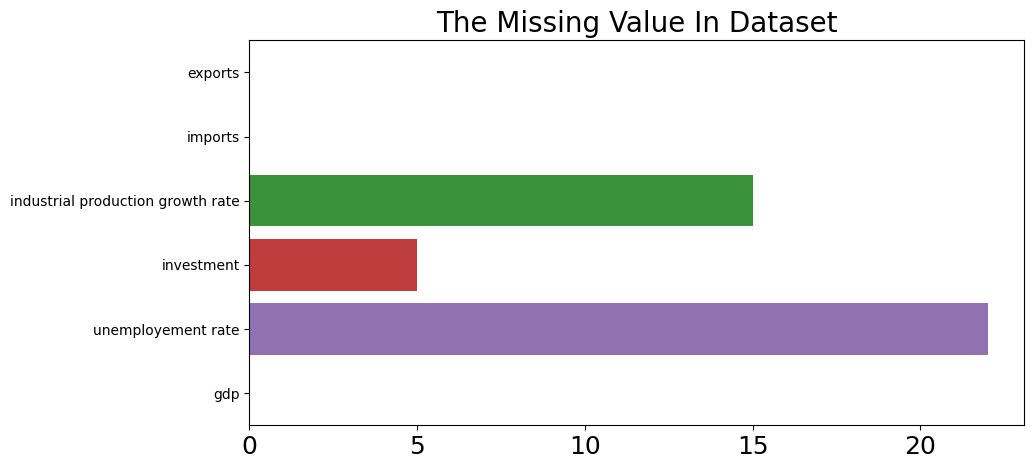

In [15]:
missing = df.isna().sum()

#plot missing value
plt.figure(figsize=(10,5))
sns.barplot(x=missing.values, y=missing.index, palette='tab10')
plt.xticks(fontsize=18)
plt.title('The Missing Value In Dataset', fontsize=20)
plt.show()

In [16]:
df_missing = df.isna().sum()
df_missing = df_missing.to_frame(name='missing')

df_missing = df_missing.reset_index()
df_missing = df_missing.rename(columns={'index':'attribute'})

df_missing 

,attribute,missing
0,exports,0
1,imports,0
2,industrial production growth rate,15
3,investment,5
4,unemployement rate,22
5,gdp,0


In [17]:
#fill missing value in more than one attribute
df['industrial production growth rate'].fillna(df['industrial production growth rate'].mean(), inplace=True)
df['investment'].fillna(df['investment'].mean(), inplace=True)
df['unemployement rate'].fillna(df['unemployement rate'].mean(), inplace=True)

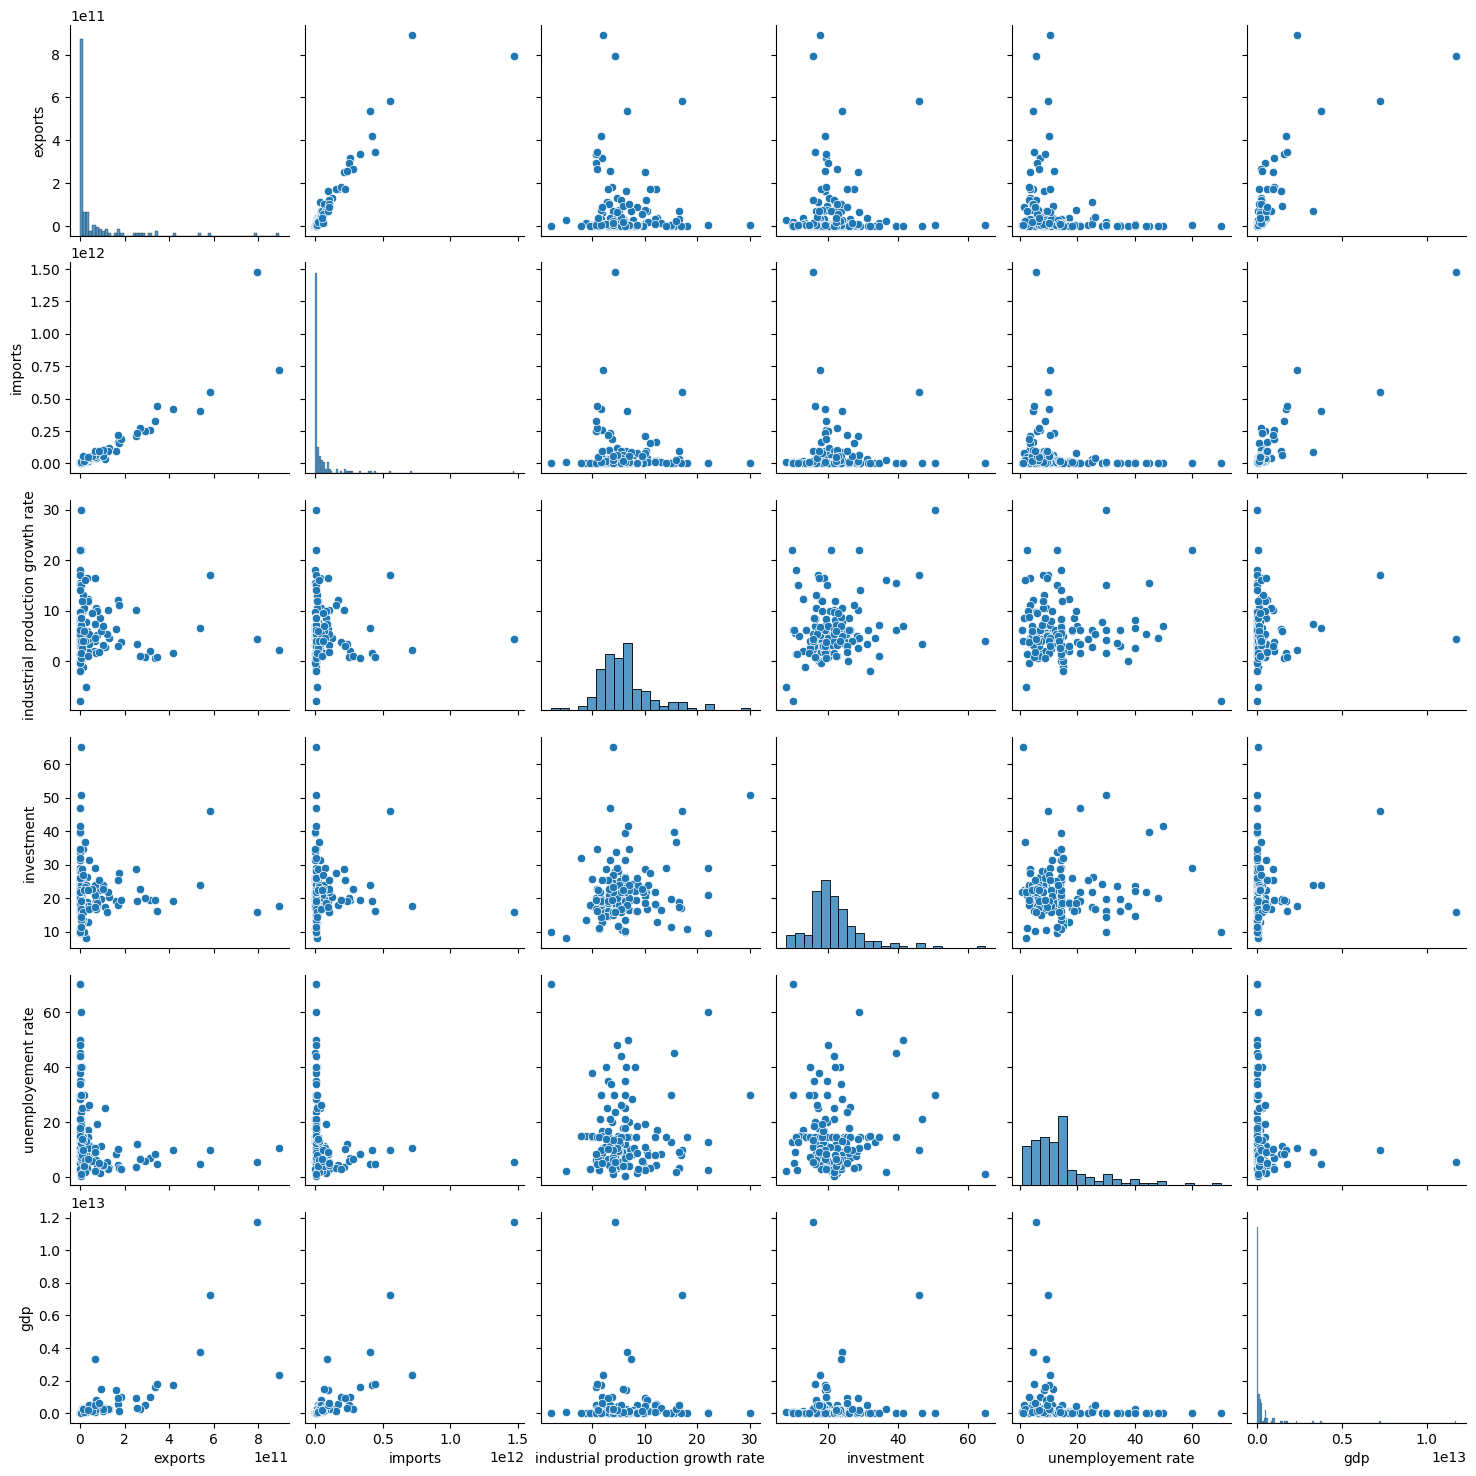

In [22]:
sns.pairplot(df)
plt.show()

In [23]:
df.to_csv('../data/clean.csv', index=False)